In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
%matplotlib inline

In [97]:
diabetes = datasets.load_diabetes()
diabetes.keys()

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [106]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Brad

In [116]:
df_diabetes = pd.DataFrame(diabetes['data'])
df_diabetes.columns = diabetes['feature_names']
df_diabetes["Disease_Progression"] = diabetes["target"]
print (df_diabetes.info())
df_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Disease_Progression
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


In [132]:
# Checking for missing values, of which there are none

for col in df_diabetes.columns:
    is_null = set(df_diabetes['age'].isnull())
    if True in is_null:
        print (col)

Text(0.5, 0, 'bmi')

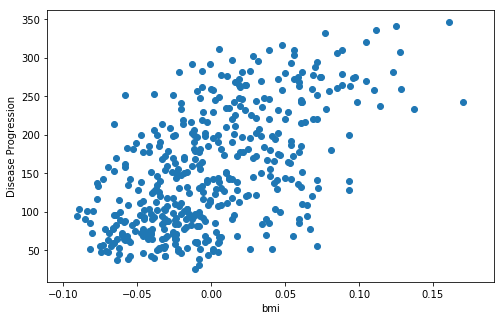

In [233]:
X = df_diabetes["bmi"]
y = df_diabetes["Disease_Progression"]

fig, axes = plt.subplots(figsize=(8,5))
axes.scatter(X, y)
axes.set_ylabel("Disease Progression")
axes.set_xlabel("bmi")

In [273]:
# X = df_diabetes[["age", "sex", "bmi", "bp", "s1", "s2", "s3", "s4", "s5", "s6"]]
X = df_diabetes[["bmi"]]
y = df_diabetes["Disease_Progression"]


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("X_train shape -> {}".format(x_train.shape))
print("y_train shape -> {}".format(y_train.shape))
print("X_test shape -> {}".format(x_test.shape))
print("y_test shape -> {}".format(y_test.shape))

X_train shape -> (353, 1)
y_train shape -> (353,)
X_test shape -> (89, 1)
y_test shape -> (89,)


In [274]:
model = linear_model.LinearRegression()
model.fit(x_train, y_train)
predictions = model.predict(x_test)

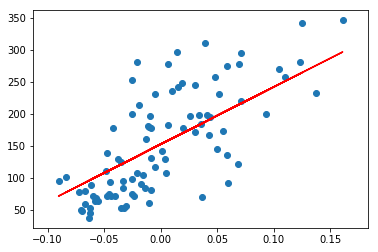

In [275]:
plt.scatter(x_test, y_test)
plt.plot(x_test, predictions, c='r')
plt.show()

In [276]:
from sklearn import metrics

print("MAE: ", metrics.mean_absolute_error(y_test, predictions))
print("MSE: ", metrics.mean_squared_error(y_test, predictions))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print("Model Score: ", model.score(x_test, y_test))

MAE:  46.389951841328845
MSE:  3200.1494988969566
RMSE:  56.56986387553851
Model Score:  0.5160426493693014
